In [1]:
import pandas as pd
cols = pd.read_csv("../var_names.csv")
data = pd.read_csv('../CSCS_data_anon.csv', low_memory=False,
                        na_values=["9999", "", " ", "Presented but no response", "NA"])
empty = (data.isna().sum()==data.shape[0])
data = data[empty.index[~empty]] # keep non empty columns only
data = data[data.REMOVE_case=='No'].copy()

In [2]:
def get_matching_keywords(keywords: list[str]) -> list[str]:
    """
    Returns the names of the columns whose string contains any of the keywords
    """
    global data
    return [col for col in data.columns if any(keyword.lower() in col.lower() for keyword in keywords)]

def get_var_details(var_name: str) -> list[tuple[str, str]]:
    """
    Returns a list of pairs detailing the question and datasets 
    corresponding to the given variable name
    """
    global cols
    filtered_data = cols[cols['new_var'] == var_name]
    
    info = []
    result: pd.DataFrame = filtered_data[['new_var', 'text', 'dataset']]
    for index, row in result.iterrows():
        info.append((row['text'], row['dataset']))

    return info

def get_column_info(column_name: str) -> None:
    """
    Returns information about a given column
    """
    global data, cols
    column_info: pd.DataFrame = data[column_name]
    print(f"{' Information about: ' + column_name + ' ':-^70}")
    details = get_var_details(column_name)
    if not details: print(f"{' No associated question found ':-^70}")
    for question, dataset in details:
        print(f"{' Dataset: ' + dataset + ' ':-^70}")
        print(f"{' Question: ' + question + ' ':-^70}")
        print(f"{'':-^70}\n")
    print(f"Number of NA: {column_info.isna().sum()}")
    print(column_info.value_counts())
    print("")

def get_datasets(column_name: str) -> list[str]:
    """
    Returns a list of datasets a variable name is found in
    """
    datasets = []
    for question, dataset in get_var_details(column_name):
        datasets.append(dataset)
    return datasets

In [3]:
# Example usage
words = ["WORK_friend"]
to_examine = get_matching_keywords(words)
for col in to_examine:
    get_column_info(col)

------- Information about: VOLUNTEERISM_volunteer_work_friends -------
------------------------ Dataset: 2022_cross -------------------------
 Question: Which of the following is true about your volunteer work? (Check all that apply) - I volunteered with friends.  
----------------------------------------------------------------------

Number of NA: 8978
VOLUNTEERISM_volunteer_work_friends
Not Selected                   579
I volunteered with friends.    461
Name: count, dtype: int64

 Information about: CONNECTION_lubben_social_network_friends_subscale_see 
------------------------ Dataset: 2023_cross -------------------------
 Question: Please answer each of the following questions about the people you know: - How many of your friends do you see or hear from at least once a month? 
----------------------------------------------------------------------

Number of NA: 8143
CONNECTION_lubben_social_network_friends_subscale_see
2             428
1             338
3             298
4     

Interests:
- CONNECTION_activities_meeting_work_p3m 
- CONNECTION_preferred_frequency_hang_out 
- CONNECTION_activities_visited_friends_p3m 
- CONNECTION_activities_new_friend_p3m / CONNECTION_activities_new_friend_last - DO busy people make new friends?
- CONNECTION_social_days_friends_p7d_grouped / CONNECTION_social_days_friends_p7d 
- CONNECTION_social_time_friends_p7d_grouped / CONNECTION_social_time_friends_p7d 
- CONNECTION_preference_time_friends_grouped / CONNECTION_preference_time_friends 
- CONNECTION_meaningful_time_friends_grouped
- CONNECTION_social_num_close_friends 
- CONNECTION_lubben_social_network_friends_subscale_see 

Money?
- CONNECTION_close_friends_same_more_money 
- CONNECTION_close_friends_same_less_money 
- CONNECTION_close_friends_same_money 
- FRIENDSHIP_hall_friendship_standards_self_money 

Humor
- FRIENDSHIP_hall_friendship_standards_self_sense_of_humor 

Work friends
- WORK_friends_num 

In [4]:
from collections import defaultdict

to_examine = ["CONNECTION_activities_meeting_work_p3m", "CONNECTION_preferred_frequency_hang_out", "CONNECTION_activities_visited_friends_p3m", "CONNECTION_activities_new_friend_p3m", "CONNECTION_activities_new_friend_last", "CONNECTION_social_days_friends_p7d_grouped", "CONNECTION_social_days_friends_p7d", "CONNECTION_social_time_friends_p7d_grouped", "CONNECTION_social_time_friends_p7d", "CONNECTION_preference_time_friends_grouped", "CONNECTION_preference_time_friends", "CONNECTION_meaningful_time_friends_groupe", "CONNECTION_social_num_close_friends", "CONNECTION_lubben_social_network_friends_subscale_see"]
to_examine = get_matching_keywords(to_examine)
var_by_dataset = defaultdict(list)

for col in to_examine:
    for dataset in get_datasets(col):
        var_by_dataset[dataset].append(col)

In [5]:
get_column_info("CONNECTION_social_barriers_too_busy")

------- Information about: CONNECTION_social_barriers_too_busy -------
------------------------ Dataset: 2022_cohort ------------------------
 Question: Which of the barriers listed below prevent you from socializing with others as much as you would like to? - I am too busy 
----------------------------------------------------------------------

------------------------ Dataset: 2022_cross -------------------------
 Question: Which of the barriers below make it difficult for you to socialize with others as much as you would like to? (Check all that apply) - Selected Choice - I am too busy  
----------------------------------------------------------------------

Number of NA: 9075
CONNECTION_social_barriers_too_busy
Not Selected     756
I am too busy    187
Name: count, dtype: int64



In [6]:
columns_2022_cohort = var_by_dataset["2022_cohort"].copy()
columns_2022_cross = var_by_dataset["2022_cross"].copy()
intersection = list(set(columns_2022_cohort).intersection(set(columns_2022_cross)))

filtered_data_cohort = data[columns_2022_cohort + ["CONNECTION_social_barriers_too_busy"]].dropna()
filtered_data_cross = data[columns_2022_cross + ["CONNECTION_social_barriers_too_busy"]].dropna()
filtered_data_2022_all = data[intersection + ["CONNECTION_social_barriers_too_busy"]].dropna()

print(f"{filtered_data_cohort.shape = }\n{filtered_data_cross.shape = }\n{filtered_data_2022_all.shape = }")

filtered_data_cohort.shape = (392, 8)
filtered_data_cross.shape = (479, 8)
filtered_data_2022_all.shape = (899, 5)


In [7]:
busy_cohort = filtered_data_cohort[filtered_data_cohort["CONNECTION_social_barriers_too_busy"] == "I am too busy"]
not_busy_cohort = filtered_data_cohort[filtered_data_cohort["CONNECTION_social_barriers_too_busy"] == "I am too busy"]
busy_cross = filtered_data_cross[filtered_data_cross["CONNECTION_social_barriers_too_busy"] == "I am too busy"]

print(f"{busy_cohort.shape = }\n{busy_cross.shape = }")

busy_cohort.shape = (99, 8)
busy_cross.shape = (70, 8)


In [8]:
busy_cohort
busy_cohort.keys()

Index(['CONNECTION_activities_visited_friends_p3m',
       'CONNECTION_activities_meeting_work_p3m',
       'CONNECTION_activities_new_friend_p3m',
       'CONNECTION_social_num_close_friends',
       'CONNECTION_social_days_friends_p7d',
       'CONNECTION_social_time_friends_p7d',
       'CONNECTION_preference_time_friends',
       'CONNECTION_social_barriers_too_busy'],
      dtype='object')

In [9]:
busy_cross

,CONNECTION_social_num_close_friends,CONNECTION_social_days_friends_p7d,CONNECTION_social_time_friends_p7d,CONNECTION_preference_time_friends,CONNECTION_activities_new_friend_last,CONNECTION_social_num_close_friends_p3m,CONNECTION_preferred_frequency_hang_out,CONNECTION_social_barriers_too_busy
5,7.0,2.0,3.0,2.0,Not in the past three months,4.0,A few times a year,I am too busy
98,2.0,1.0,1.0,1.0,Not in the past three months,0.0,Every few months,I am too busy
137,3.0,3.0,3.0,24.0,In the past two or three days,2.0,About once per week,I am too busy
163,7.0,2.0,2.0,3.0,In the past month,5.0,Not at all,I am too busy
365,5.0,4.0,8.0,4.0,In the past two weeks,10.0,About once per month,I am too busy
...,...,...,...,...,...,...,...,...
10747,4.0,3.0,3.0,4.0,Not in the past three months,2.0,A few times a year,I am too busy
10806,6.0,5.0,4.0,24.0,In the past week,4.0,About once per week,I am too busy
11045,12.0,3.0,15.0,10.0,Not in the past three months,25.0,Every few weeks,I am too busy
11167,3.0,3.0,3.0,3.0,In the past month,3.0,About once per month,I am too busy


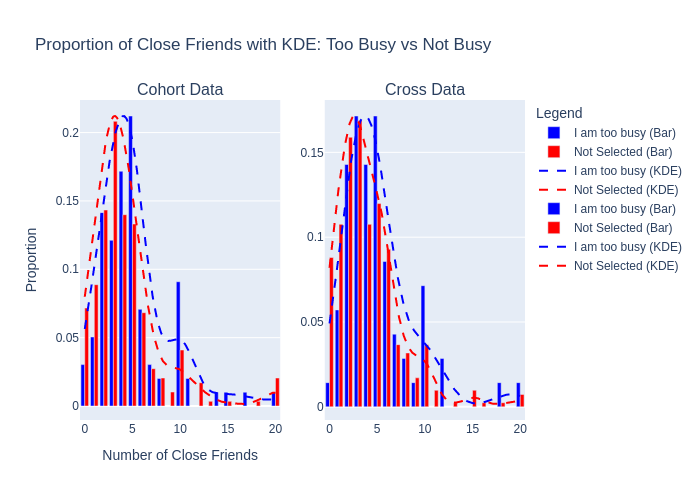

In [10]:
import plotly.graph_objects as go
import numpy as np
from scipy.stats import gaussian_kde
from plotly.subplots import make_subplots

# Group and count data by 'CONNECTION_social_barriers_too_busy' and 'CONNECTION_social_num_close_friends'
def create_plot(data, title_suffix):
    grouped_data = (
        data.groupby(["CONNECTION_social_barriers_too_busy", "CONNECTION_social_num_close_friends"])
        .size()
        .reset_index(name="Count")
    )

    # Calculate proportions within each "Too Busy Status" group
    group_totals = grouped_data.groupby("CONNECTION_social_barriers_too_busy")["Count"].transform("sum")
    grouped_data["Proportion"] = grouped_data["Count"] / group_totals

    # Prepare the data for KDE calculation
    busy_data = data.loc[
        data["CONNECTION_social_barriers_too_busy"] == "I am too busy", 
        "CONNECTION_social_num_close_friends"
    ]
    not_busy_data = data.loc[
        data["CONNECTION_social_barriers_too_busy"] == "Not Selected", 
        "CONNECTION_social_num_close_friends"
    ]

    # Calculate KDE for both groups
    busy_kde = gaussian_kde(busy_data)
    not_busy_kde = gaussian_kde(not_busy_data)

    # Define the x-axis range for KDE
    x_range = np.linspace(
        min(data["CONNECTION_social_num_close_friends"]),
        max(data["CONNECTION_social_num_close_friends"]),
        500
    )

    # KDE values
    busy_kde_values = busy_kde(x_range)
    not_busy_kde_values = not_busy_kde(x_range)

    # Return the data and the necessary components for plotting
    return grouped_data, busy_kde_values, not_busy_kde_values, x_range

# Create plots for filtered_data_cohort and filtered_data_cross
def create_subplots(filtered_data_cohort, filtered_data_cross):
    # Create the subplots layout with two columns
    fig = make_subplots(
        rows=1, cols=2, 
        subplot_titles=["Cohort Data", "Cross Data"]
    )

    # Plot for filtered_data_cohort
    cohort_grouped_data, cohort_busy_kde, cohort_not_busy_kde, cohort_x_range = create_plot(filtered_data_cohort, "Cohort")

    # Add bar plots for proportions (Cohort data)
    for status, color in zip(["I am too busy", "Not Selected"], ["blue", "red"]):
        status_data = cohort_grouped_data[cohort_grouped_data["CONNECTION_social_barriers_too_busy"] == status]
        fig.add_trace(
            go.Bar(
                x=status_data["CONNECTION_social_num_close_friends"],
                y=status_data["Proportion"],
                name=f"{status} (Bar)",
                marker=dict(color=color),
            ),
            row=1, col=1
        )

    # Add KDE plots for cohort data
    fig.add_trace(
        go.Scatter(
            x=cohort_x_range,
            y=cohort_busy_kde / cohort_busy_kde.max() * cohort_grouped_data["Proportion"].max(),  # Scale KDE
            mode="lines",
            line=dict(color="blue", dash="dash"),
            name="I am too busy (KDE)",
        ),
        row=1, col=1
    )
    fig.add_trace(
        go.Scatter(
            x=cohort_x_range,
            y=cohort_not_busy_kde / cohort_not_busy_kde.max() * cohort_grouped_data["Proportion"].max(),  # Scale KDE
            mode="lines",
            line=dict(color="red", dash="dash"),
            name="Not Selected (KDE)",
        ),
        row=1, col=1
    )

    # Plot for filtered_data_cross
    cross_grouped_data, cross_busy_kde, cross_not_busy_kde, cross_x_range = create_plot(filtered_data_cross, "Cross")

    # Add bar plots for proportions (Cross data)
    for status, color in zip(["I am too busy", "Not Selected"], ["blue", "red"]):
        status_data = cross_grouped_data[cross_grouped_data["CONNECTION_social_barriers_too_busy"] == status]
        fig.add_trace(
            go.Bar(
                x=status_data["CONNECTION_social_num_close_friends"],
                y=status_data["Proportion"],
                name=f"{status} (Bar)",
                marker=dict(color=color),
            ),
            row=1, col=2
        )

    # Add KDE plots for cross data
    fig.add_trace(
        go.Scatter(
            x=cross_x_range,
            y=cross_busy_kde / cross_busy_kde.max() * cross_grouped_data["Proportion"].max(),  # Scale KDE
            mode="lines",
            line=dict(color="blue", dash="dash"),
            name="I am too busy (KDE)",
        ),
        row=1, col=2
    )
    fig.add_trace(
        go.Scatter(
            x=cross_x_range,
            y=cross_not_busy_kde / cross_not_busy_kde.max() * cross_grouped_data["Proportion"].max(),  # Scale KDE
            mode="lines",
            line=dict(color="red", dash="dash"),
            name="Not Selected (KDE)",
        ),
        row=1, col=2
    )

    # Update layout for side-by-side display
    fig.update_layout(
        title="Proportion of Close Friends with KDE: Too Busy vs Not Busy",
        xaxis_title="Number of Close Friends",
        yaxis_title="Proportion",
        barmode="group",  # Keep bars side by side
        legend_title="Legend",
        showlegend=True,
        height=500
    )

    # Show the figure
    fig.show(renderer="png")

# Call the function with filtered_data_cohort and filtered_data_cross
create_subplots(filtered_data_cohort, filtered_data_cross)


In [11]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for filtered_data_cohort
Q1_cohort = filtered_data_cohort["CONNECTION_social_num_close_friends"].quantile(0.25)
Q3_cohort = filtered_data_cohort["CONNECTION_social_num_close_friends"].quantile(0.75)

# Calculate IQR for filtered_data_cohort
IQR_cohort = Q3_cohort - Q1_cohort

# Define the lower and upper bounds for outlier detection for filtered_data_cohort
lower_bound_cohort = Q1_cohort - 1.5 * IQR_cohort
upper_bound_cohort = Q3_cohort + 1.5 * IQR_cohort

# Filter the cohort dataset to remove outliers
filtered_data_no_outliers_cohort = filtered_data_cohort[
    (filtered_data_cohort["CONNECTION_social_num_close_friends"] >= lower_bound_cohort) &
    (filtered_data_cohort["CONNECTION_social_num_close_friends"] <= upper_bound_cohort)
]

# Display the filtered cohort data
filtered_data_no_outliers_cohort.head()

# Repeat the same steps for filtered_data_cross

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for filtered_data_cross
Q1_cross = filtered_data_cross["CONNECTION_social_num_close_friends"].quantile(0.25)
Q3_cross = filtered_data_cross["CONNECTION_social_num_close_friends"].quantile(0.75)

# Calculate IQR for filtered_data_cross
IQR_cross = Q3_cross - Q1_cross

# Define the lower and upper bounds for outlier detection for filtered_data_cross
lower_bound_cross = Q1_cross - 1.5 * IQR_cross
upper_bound_cross = Q3_cross + 1.5 * IQR_cross

# Filter the cross dataset to remove outliers
filtered_data_no_outliers_cross = filtered_data_cross[
    (filtered_data_cross["CONNECTION_social_num_close_friends"] >= lower_bound_cross) &
    (filtered_data_cross["CONNECTION_social_num_close_friends"] <= upper_bound_cross)
]

# Display the filtered cross data
filtered_data_no_outliers_cross.head()


,CONNECTION_social_num_close_friends,CONNECTION_social_days_friends_p7d,CONNECTION_social_time_friends_p7d,CONNECTION_preference_time_friends,CONNECTION_activities_new_friend_last,CONNECTION_social_num_close_friends_p3m,CONNECTION_preferred_frequency_hang_out,CONNECTION_social_barriers_too_busy
5,7.0,2.0,3.0,2.0,Not in the past three months,4.0,A few times a year,I am too busy
7,0.0,0.0,0.0,0.0,Not in the past three months,0.0,Not at all,Not Selected
57,5.0,7.0,10.0,17.0,Not in the past three months,3.0,Every few weeks,Not Selected
62,4.0,1.0,1.0,2.0,Not in the past three months,1.0,Less than once per year,Not Selected
68,1.0,0.0,0.0,4.0,Not in the past three months,1.0,Not at all,Not Selected


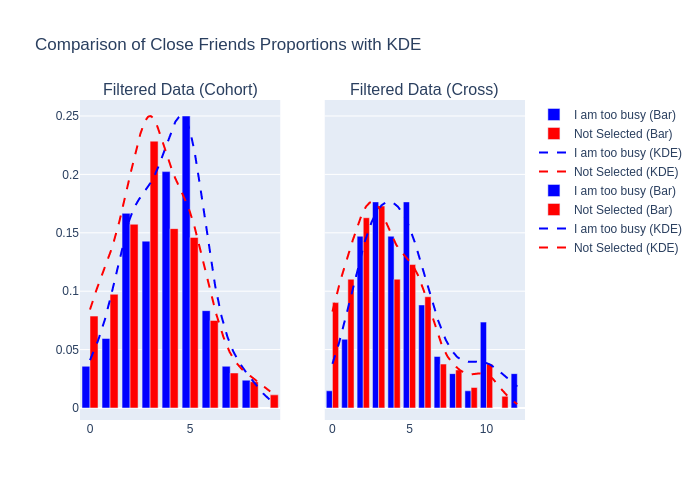

In [12]:
import plotly.graph_objects as go
import numpy as np
from scipy.stats import gaussian_kde
from plotly.subplots import make_subplots

# Helper function to generate the plot for any dataset
def generate_kde_plot(filtered_data, title):
    # Group and count data by 'CONNECTION_social_barriers_too_busy' and 'CONNECTION_social_num_close_friends'
    grouped_data = (
        filtered_data.groupby(["CONNECTION_social_barriers_too_busy", "CONNECTION_social_num_close_friends"])
        .size()
        .reset_index(name="Count")
    )

    # Calculate proportions within each "Too Busy Status" group
    group_totals = grouped_data.groupby("CONNECTION_social_barriers_too_busy")["Count"].transform("sum")
    grouped_data["Proportion"] = grouped_data["Count"] / group_totals

    # Prepare the data for KDE calculation
    busy_data = filtered_data.loc[
        filtered_data["CONNECTION_social_barriers_too_busy"] == "I am too busy", 
        "CONNECTION_social_num_close_friends"
    ]
    not_busy_data = filtered_data.loc[
        filtered_data["CONNECTION_social_barriers_too_busy"] == "Not Selected", 
        "CONNECTION_social_num_close_friends"
    ]

    # Calculate KDE for both groups
    busy_kde = gaussian_kde(busy_data)
    not_busy_kde = gaussian_kde(not_busy_data)

    # Define the x-axis range for KDE
    x_range = np.linspace(
        min(filtered_data["CONNECTION_social_num_close_friends"]),
        max(filtered_data["CONNECTION_social_num_close_friends"]),
        500
    )

    # KDE values
    busy_kde_values = busy_kde(x_range)
    not_busy_kde_values = not_busy_kde(x_range)

    # Create the plot
    fig = go.Figure()

    # Add bar plots for proportions (side-by-side)
    for status, color in zip(["I am too busy", "Not Selected"], ["blue", "red"]):
        status_data = grouped_data[grouped_data["CONNECTION_social_barriers_too_busy"] == status]
        fig.add_trace(
            go.Bar(
                x=status_data["CONNECTION_social_num_close_friends"],
                y=status_data["Proportion"],
                name=f"{status} (Bar)",
                marker=dict(color=color),
            )
        )

    # Add KDE plots
    fig.add_trace(
        go.Scatter(
            x=x_range,
            y=busy_kde_values / busy_kde_values.max() * grouped_data["Proportion"].max(),  # Scale KDE
            mode="lines",
            line=dict(color="blue", dash="dash"),
            name="I am too busy (KDE)",
        )
    )
    fig.add_trace(
        go.Scatter(
            x=x_range,
            y=not_busy_kde_values / not_busy_kde_values.max() * grouped_data["Proportion"].max(),  # Scale KDE
            mode="lines",
            line=dict(color="red", dash="dash"),
            name="Not Selected (KDE)",
        )
    )

    # Update layout
    fig.update_layout(
        title=title,
        xaxis_title="Number of Close Friends",
        yaxis_title="Proportion",
        barmode="group",  # Keep bars side by side
        legend_title="Legend",
    )

    return fig

# Create a subplot with two columns
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=["Filtered Data (Cohort)", "Filtered Data (Cross)"],
    shared_yaxes=True  # Share y-axis to align the bars and KDE plots
)

# Generate and add traces for filtered_data_cohort (right subplot)
cohort_fig = generate_kde_plot(filtered_data_no_outliers_cohort, "Proportion of Close Friends with KDE: Cohort")
for trace in cohort_fig.data:
    fig.add_trace(trace, row=1, col=1)

# Generate and add traces for filtered_data_cross (left subplot)
cross_fig = generate_kde_plot(filtered_data_no_outliers_cross, "Proportion of Close Friends with KDE: Cross")
for trace in cross_fig.data:
    fig.add_trace(trace, row=1, col=2)

# Update layout for overall figure
fig.update_layout(
    title="Comparison of Close Friends Proportions with KDE",
    showlegend=True,
)

fig.show(renderer="png")


In [13]:
get_column_info("CONNECTION_activities_visited_friends_p3m")

---- Information about: CONNECTION_activities_visited_friends_p3m ----
------------------------ Dataset: 2021_cross -------------------------
 Question: In the PAST THREE MONTH, how often have you... - visited with FRIENDS at your / their home? 
----------------------------------------------------------------------

------------------------ Dataset: 2022_cohort ------------------------
 Question: In the PAST THREE MONTH, how often have you... - visited with FRIENDS at your / their home? 
----------------------------------------------------------------------

------------------------ Dataset: 2023_cohort ------------------------
 Question: In the PAST THREE MONTH, how often have you... - visited with FRIENDS at your / their home? 
----------------------------------------------------------------------

------------------------ Dataset: 2023_cross -------------------------
 Question: In the PAST THREE MONTH, how often have you... - visited with FRIENDS at your or their home? 
------------

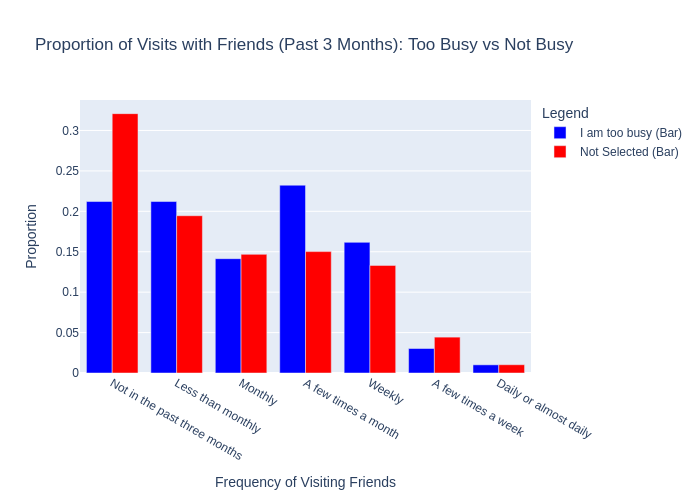

In [14]:
import plotly.graph_objects as go
import pandas as pd

# Step 1: Clean data
filtered_data_no_na = filtered_data_cohort.dropna(subset=["CONNECTION_activities_visited_friends_p3m"])

# Step 2: Map ordinal categories to numeric values
ordinal_mapping = {
    "Not in the past three months": 0,
    "Less than monthly": 1,
    "Monthly": 2,
    "A few times a month": 3,
    "Weekly": 4,
    "A few times a week": 5,
    "Daily or almost daily": 6
}
filtered_data_no_na["Visited_Friends_Num"] = filtered_data_no_na["CONNECTION_activities_visited_friends_p3m"].map(ordinal_mapping)

# Step 3: Group and calculate proportions
grouped_data = (
    filtered_data_no_na.groupby(["CONNECTION_social_barriers_too_busy", "Visited_Friends_Num"])
    .size()
    .reset_index(name="Count")
)

group_totals = grouped_data.groupby("CONNECTION_social_barriers_too_busy")["Count"].transform("sum")
grouped_data["Proportion"] = grouped_data["Count"] / group_totals

# Step 4: Create the plot
fig = go.Figure()

# Add bar plots for proportions (side-by-side)
categories = list(ordinal_mapping.keys())
for status, color in zip(["I am too busy", "Not Selected"], ["blue", "red"]):
    status_data = grouped_data[grouped_data["CONNECTION_social_barriers_too_busy"] == status]
    fig.add_trace(
        go.Bar(
            x=[categories[num] for num in status_data["Visited_Friends_Num"]],
            y=status_data["Proportion"],
            name=f"{status} (Bar)",
            marker=dict(color=color),
        )
    )

# Update layout
fig.update_layout(
    title="Proportion of Visits with Friends (Past 3 Months): Too Busy vs Not Busy",
    xaxis_title="Frequency of Visiting Friends",
    yaxis_title="Proportion",
    barmode="group",  # Keep bars side by side
    legend_title="Legend",
    xaxis=dict(categoryorder="array", categoryarray=categories),  # Maintain ordinal order
)

fig.show(renderer="png")



In [15]:
get_column_info("CONNECTION_preference_time_friends")

------- Information about: CONNECTION_preference_time_friends --------
------------------------ Dataset: 2022_cohort ------------------------
 Question: How much time per week would you like to spend socializing with others from the following groups? - Friends 
----------------------------------------------------------------------

------------------------ Dataset: 2022_cross -------------------------
 Question: Ideally, how many hours per week would you like to spend socializing with each of the following groups? - Friends 
----------------------------------------------------------------------

------------------------ Dataset: 2023_cohort ------------------------
 Question: How much time per week would you like to spend socializing with others from the following groups? - Friends 
----------------------------------------------------------------------

Number of NA: 7040
CONNECTION_preference_time_friends
2.0      374
4.0      329
3.0      325
5.0      315
6.0      239
10.0     233
1.

/tmp/ipykernel_216/1455966810.py:17: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipykernel_216/1455966810.py:17: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



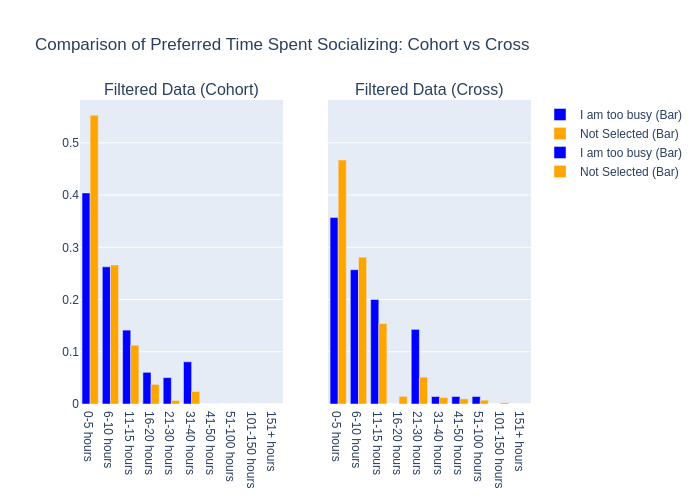

In [16]:
import plotly.graph_objects as go
import pandas as pd
from plotly.subplots import make_subplots

# Helper function to generate the preferred time plot for any dataset
def generate_time_spent_plot(filtered_data, title):
    # Step 1: Clean data by dropping rows with NA in the relevant variable
    filtered_data_no_na = filtered_data.dropna(subset=["CONNECTION_preference_time_friends"])

    # Step 2: Create time bins (e.g., 0-5 hours, 6-10 hours, etc.)
    bins = [0, 5, 10, 15, 20, 30, 40, 50, 100, 150, 200]
    labels = ["0-5 hours", "6-10 hours", "11-15 hours", "16-20 hours", "21-30 hours", "31-40 hours", "41-50 hours", "51-100 hours", "101-150 hours", "151+ hours"]
    filtered_data_no_na["Time_Friends_Binned"] = pd.cut(filtered_data_no_na["CONNECTION_preference_time_friends"], bins=bins, labels=labels, right=False)

    # Step 3: Group by "Too Busy" status and time bins, calculate counts
    grouped_data = (
        filtered_data_no_na.groupby(["CONNECTION_social_barriers_too_busy", "Time_Friends_Binned"])
        .size()
        .reset_index(name="Count")
    )

    # Step 4: Calculate proportions within each "Too Busy" group
    group_totals = grouped_data.groupby("CONNECTION_social_barriers_too_busy")["Count"].transform("sum")
    grouped_data["Proportion"] = grouped_data["Count"] / group_totals

    # Step 5: Create the plot
    fig = go.Figure()

    # Add bar plots for proportions (side-by-side)
    for status, color in zip(["I am too busy", "Not Selected"], ["blue", "orange"]):
        status_data = grouped_data[grouped_data["CONNECTION_social_barriers_too_busy"] == status]
        fig.add_trace(
            go.Bar(
                x=status_data["Time_Friends_Binned"],
                y=status_data["Proportion"],
                name=f"{status} (Bar)",
                marker=dict(color=color),
            )
        )

    # Step 6: Update the layout
    fig.update_layout(
        title=title,
        xaxis_title="Preferred Time (hours per week)",
        yaxis_title="Proportion",
        barmode="group",  # Keep bars side by side
        legend_title="Legend",
        xaxis=dict(categoryorder="array", categoryarray=labels),  # Maintain custom bin order
    )

    return fig

# Create a subplot with two columns
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=["Filtered Data (Cohort)", "Filtered Data (Cross)"],
    shared_yaxes=True  # Share y-axis to align the bars
)

# Generate and add traces for filtered_data_cohort (right subplot)
cohort_fig = generate_time_spent_plot(filtered_data_cohort, "Preferred Time Spent Socializing: Cohort")
for trace in cohort_fig.data:
    fig.add_trace(trace, row=1, col=1)

# Generate and add traces for filtered_data_cross (left subplot)
cross_fig = generate_time_spent_plot(filtered_data_cross, "Preferred Time Spent Socializing: Cross")
for trace in cross_fig.data:
    fig.add_trace(trace, row=1, col=2)

# Update layout for overall figure
fig.update_layout(
    title="Comparison of Preferred Time Spent Socializing: Cohort vs Cross",
    showlegend=True,
)

fig.show(renderer="png")


In [17]:
get_column_info("CONNECTION_activities_new_friend_p3m")

------ Information about: CONNECTION_activities_new_friend_p3m -------
------------------------ Dataset: 2021_cross -------------------------
 Question: In the PAST THREE MONTH, how often have you... - made a new friend? 
----------------------------------------------------------------------

------------------------ Dataset: 2022_cohort ------------------------
 Question: In the PAST THREE MONTH, how often have you... - made a new friend? 
----------------------------------------------------------------------

------------------------ Dataset: 2023_cohort ------------------------
 Question: In the PAST THREE MONTH, how often have you... - made a new friend? 
----------------------------------------------------------------------

------------------------ Dataset: 2023_cross -------------------------
 Question: In the PAST THREE MONTH, how often have you... - made a new friend? 
----------------------------------------------------------------------

Number of NA: 4052
CONNECTION_activit

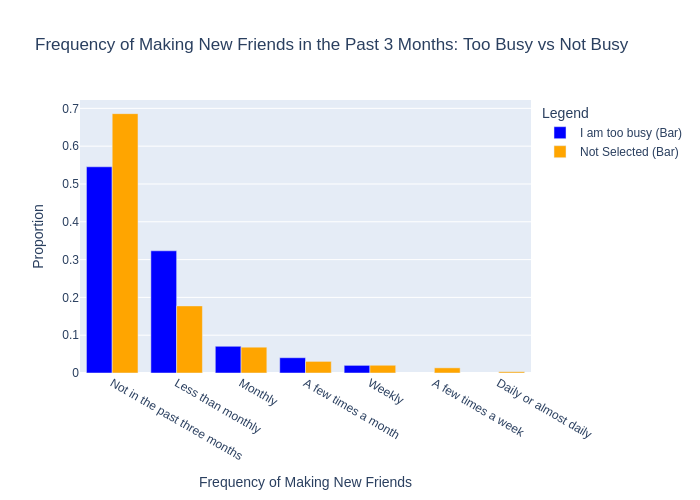

In [18]:
import plotly.graph_objects as go
import pandas as pd

# Step 1: Clean data by dropping rows with NA in the relevant variable
filtered_data_no_na = filtered_data_cohort.dropna(subset=["CONNECTION_activities_new_friend_p3m"])

# Step 2: Map ordinal categories to numeric values
ordinal_mapping = {
    "Not in the past three months": 0,
    "Less than monthly": 1,
    "Monthly": 2,
    "A few times a month": 3,
    "Weekly": 4,
    "A few times a week": 5,
    "Daily or almost daily": 6
}
filtered_data_no_na["New_Friend_Frequency_Num"] = filtered_data_no_na["CONNECTION_activities_new_friend_p3m"].map(ordinal_mapping)

# Step 3: Group by "Too Busy" status and frequency, calculate counts
grouped_data = (
    filtered_data_no_na.groupby(["CONNECTION_social_barriers_too_busy", "New_Friend_Frequency_Num"])
    .size()
    .reset_index(name="Count")
)

# Step 4: Calculate proportions within each "Too Busy" group
group_totals = grouped_data.groupby("CONNECTION_social_barriers_too_busy")["Count"].transform("sum")
grouped_data["Proportion"] = grouped_data["Count"] / group_totals

# Step 5: Create the plot
fig = go.Figure()

# Add bar plots for proportions (side-by-side)
categories = list(ordinal_mapping.keys())
for status, color in zip(["I am too busy", "Not Selected"], ["blue", "orange"]):
    status_data = grouped_data[grouped_data["CONNECTION_social_barriers_too_busy"] == status]
    fig.add_trace(
        go.Bar(
            x=[categories[num] for num in status_data["New_Friend_Frequency_Num"]],
            y=status_data["Proportion"],
            name=f"{status} (Bar)",
            marker=dict(color=color),
        )
    )

# Step 6: Update the layout
fig.update_layout(
    title="Frequency of Making New Friends in the Past 3 Months: Too Busy vs Not Busy",
    xaxis_title="Frequency of Making New Friends",
    yaxis_title="Proportion",
    barmode="group",  # Keep bars side by side
    legend_title="Legend",
    xaxis=dict(categoryorder="array", categoryarray=categories),  # Maintain ordinal order
)

fig.show(renderer="png")


In [19]:
get_column_info("CONNECTION_social_time_friends_p7d")

------- Information about: CONNECTION_social_time_friends_p7d --------
------------------------ Dataset: 2022_cohort ------------------------
 Question: In the PAST SEVEN DAYS, how many hours in total did you spend socializing with others from the following groups? - Friends 
----------------------------------------------------------------------

------------------------ Dataset: 2022_cross -------------------------
 Question: In the PAST WEEK, how many hours in total did you spend socializing with others from the following groups? - Friends 
----------------------------------------------------------------------

------------------------ Dataset: 2023_cohort ------------------------
 Question: In the PAST SEVEN DAYS, how many hours in total did you spend socializing with others from the following groups? - Friends 
----------------------------------------------------------------------

------------------------ Dataset: 2023_cross -------------------------
 Question: In the PAST WEEK, h

/tmp/ipykernel_216/3540357085.py:17: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipykernel_216/3540357085.py:17: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



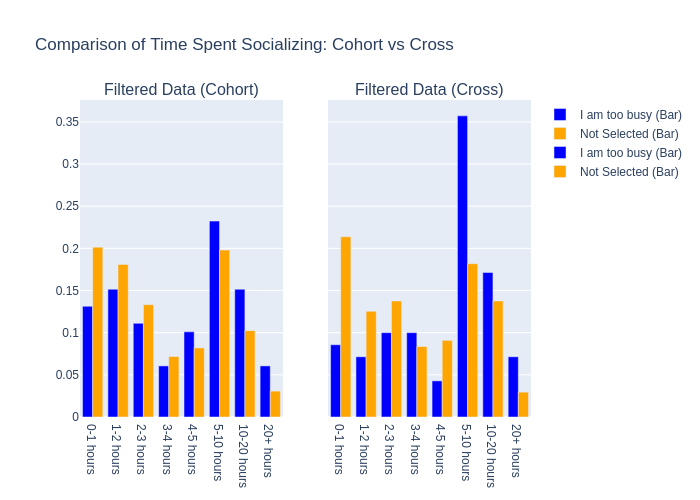

In [20]:
import plotly.graph_objects as go
import pandas as pd
from plotly.subplots import make_subplots

# Helper function to generate the social time plot for any dataset
def generate_social_time_plot(filtered_data, title):
    # Step 1: Clean data by dropping rows with NA in the relevant variable
    filtered_data_no_na = filtered_data.dropna(subset=["CONNECTION_social_time_friends_p7d"])

    # Step 2: Bin the continuous hours variable into categories (e.g., 0-1 hours, 1-2 hours, etc.)
    bins = [0, 1, 2, 3, 4, 5, 10, 20, 50]
    labels = ['0-1 hours', '1-2 hours', '2-3 hours', '3-4 hours', '4-5 hours', '5-10 hours', '10-20 hours', '20+ hours']
    filtered_data_no_na['Social_Time_Friends_Binned'] = pd.cut(filtered_data_no_na['CONNECTION_social_time_friends_p7d'], bins=bins, labels=labels, right=False)

    # Step 3: Group by "Too Busy" status and time spent socializing, calculate counts
    grouped_data = (
        filtered_data_no_na.groupby(["CONNECTION_social_barriers_too_busy", "Social_Time_Friends_Binned"])
        .size()
        .reset_index(name="Count")
    )

    # Step 4: Calculate proportions within each "Too Busy" group
    group_totals = grouped_data.groupby("CONNECTION_social_barriers_too_busy")["Count"].transform("sum")
    grouped_data["Proportion"] = grouped_data["Count"] / group_totals

    # Step 5: Create the plot
    fig = go.Figure()

    # Add bar plots for proportions (side-by-side)
    for status, color in zip(["I am too busy", "Not Selected"], ["blue", "orange"]):
        status_data = grouped_data[grouped_data["CONNECTION_social_barriers_too_busy"] == status]
        fig.add_trace(
            go.Bar(
                x=status_data["Social_Time_Friends_Binned"],
                y=status_data["Proportion"],
                name=f"{status} (Bar)",
                marker=dict(color=color),
            )
        )

    # Step 6: Update the layout
    fig.update_layout(
        title=title,
        xaxis_title="Time Spent Socializing (Hours)",
        yaxis_title="Proportion",
        barmode="group",  # Keep bars side by side
        legend_title="Legend",
        xaxis=dict(categoryorder="array", categoryarray=labels),  # Maintain custom bin order
    )

    return fig

# Create a subplot with two columns
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=["Filtered Data (Cohort)", "Filtered Data (Cross)"],
    shared_yaxes=True  # Share y-axis to align the bars
)

# Generate and add traces for filtered_data_cohort (right subplot)
cohort_fig = generate_social_time_plot(filtered_data_cohort, "Time Spent Socializing: Cohort")
for trace in cohort_fig.data:
    fig.add_trace(trace, row=1, col=1)

# Generate and add traces for filtered_data_cross (left subplot)
cross_fig = generate_social_time_plot(filtered_data_cross, "Time Spent Socializing: Cross")
for trace in cross_fig.data:
    fig.add_trace(trace, row=1, col=2)

# Update layout for overall figure
fig.update_layout(
    title="Comparison of Time Spent Socializing: Cohort vs Cross",
    showlegend=True,
)

fig.show(renderer="png")


In [21]:
get_column_info("CONNECTION_social_days_friends_p7d")

------- Information about: CONNECTION_social_days_friends_p7d --------
------------------------ Dataset: 2022_cohort ------------------------
 Question: In the PAST SEVEN DAYS, how many days did you spend at least 5 minutes socializing with people from the following groups? - Friends 
----------------------------------------------------------------------

------------------------ Dataset: 2022_cross -------------------------
 Question: In the PAST WEEK, how many days did you spend at least 5 minutes socializing with people from the following groups? - Friends 
----------------------------------------------------------------------

------------------------ Dataset: 2023_cohort ------------------------
 Question: In the PAST SEVEN DAYS, how many days did you spend at least 5 minutes socializing with people from the following groups? - Friends 
----------------------------------------------------------------------

------------------------ Dataset: 2023_cross -------------------------
 Qu

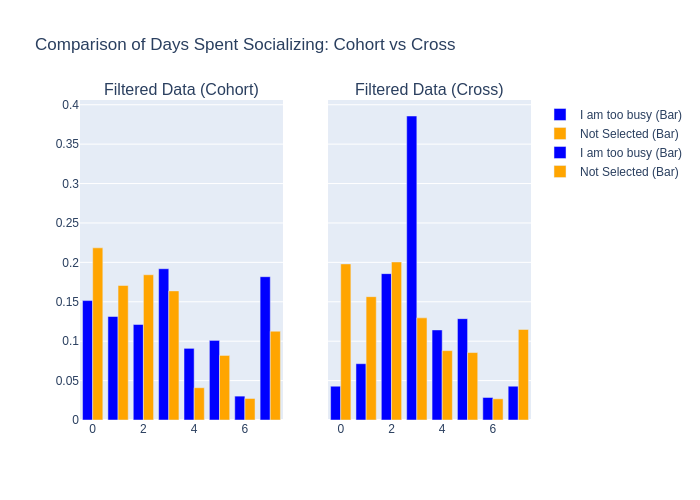

In [22]:
import plotly.graph_objects as go
import pandas as pd
from plotly.subplots import make_subplots

# Helper function to generate the social days plot for any dataset
def generate_social_days_plot(filtered_data, title):
    # Step 1: Clean data by dropping rows with NA in the relevant variable
    filtered_data_no_na = filtered_data.dropna(subset=["CONNECTION_social_days_friends_p7d"])

    # Step 2: Group by "Too Busy" status and number of days spent socializing, calculate counts
    grouped_data = (
        filtered_data_no_na.groupby(["CONNECTION_social_barriers_too_busy", "CONNECTION_social_days_friends_p7d"])
        .size()
        .reset_index(name="Count")
    )

    # Step 3: Calculate proportions within each "Too Busy" group
    group_totals = grouped_data.groupby("CONNECTION_social_barriers_too_busy")["Count"].transform("sum")
    grouped_data["Proportion"] = grouped_data["Count"] / group_totals

    # Step 4: Create the plot
    fig = go.Figure()

    # Add bar plots for proportions (side-by-side)
    for status, color in zip(["I am too busy", "Not Selected"], ["blue", "orange"]):
        status_data = grouped_data[grouped_data["CONNECTION_social_barriers_too_busy"] == status]
        fig.add_trace(
            go.Bar(
                x=status_data["CONNECTION_social_days_friends_p7d"],
                y=status_data["Proportion"],
                name=f"{status} (Bar)",
                marker=dict(color=color),
            )
        )

    # Step 5: Update the layout
    fig.update_layout(
        title=title,
        xaxis_title="Days Spent Socializing",
        yaxis_title="Proportion",
        barmode="group",  # Keep bars side by side
        legend_title="Legend",
    )

    return fig

# Create a subplot with two columns
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=["Filtered Data (Cohort)", "Filtered Data (Cross)"],
    shared_yaxes=True  # Share y-axis to align the bars
)

# Generate and add traces for filtered_data_cohort (right subplot)
cohort_fig = generate_social_days_plot(filtered_data_cohort, "Days Spent Socializing: Cohort")
for trace in cohort_fig.data:
    fig.add_trace(trace, row=1, col=1)

# Generate and add traces for filtered_data_cross (left subplot)
cross_fig = generate_social_days_plot(filtered_data_cross, "Days Spent Socializing: Cross")
for trace in cross_fig.data:
    fig.add_trace(trace, row=1, col=2)

# Update layout for overall figure
fig.update_layout(
    title="Comparison of Days Spent Socializing: Cohort vs Cross",
    showlegend=True,
)

fig.show(renderer="png")


In [23]:
import statsmodels.formula.api as smf

# Step 1: Clean data by dropping missing values for the relevant columns
filtered_data_no_na = filtered_data_cohort.dropna(subset=[
    "CONNECTION_social_barriers_too_busy", 
    "CONNECTION_preference_time_friends", 
    "CONNECTION_activities_visited_friends_p3m", 
    "CONNECTION_social_num_close_friends", 
    "CONNECTION_social_time_friends_p7d"
])

# Step 2: Create the OLS model using smf.ols with a formula
# For categorical variables, smf automatically handles one-hot encoding
formula = 'CONNECTION_social_time_friends_p7d ~ CONNECTION_social_barriers_too_busy + ' \
          'CONNECTION_preference_time_friends + CONNECTION_activities_visited_friends_p3m + ' \
          'CONNECTION_social_num_close_friends'

# Step 3: Fit the model
ols_model = smf.ols(formula=formula, data=filtered_data_cohort).fit()

# Step 4: Output the summary of the model
print(ols_model.summary())


                                    OLS Regression Results                                    
Dep. Variable:     CONNECTION_social_time_friends_p7d   R-squared:                       0.395
Model:                                            OLS   Adj. R-squared:                  0.380
Method:                                 Least Squares   F-statistic:                     27.67
Date:                                Tue, 26 Nov 2024   Prob (F-statistic):           7.99e-37
Time:                                        17:49:24   Log-Likelihood:                -1153.6
No. Observations:                                 392   AIC:                             2327.
Df Residuals:                                     382   BIC:                             2367.
Df Model:                                           9                                         
Covariance Type:                            nonrobust                                         
                                                  

In [24]:
# Step 2: Create the OLS model using smf.ols with a formula
# For categorical variables, smf automatically handles one-hot encoding
formula = 'CONNECTION_social_time_friends_p7d ~ CONNECTION_social_barriers_too_busy'

# Step 3: Fit the model
ols_model = smf.ols(formula=formula, data=filtered_data_2022_all).fit()

# Step 4: Output the summary of the model
print(ols_model.summary())

                                    OLS Regression Results                                    
Dep. Variable:     CONNECTION_social_time_friends_p7d   R-squared:                       0.014
Model:                                            OLS   Adj. R-squared:                  0.013
Method:                                 Least Squares   F-statistic:                     12.82
Date:                                Tue, 26 Nov 2024   Prob (F-statistic):           0.000362
Time:                                        17:49:24   Log-Likelihood:                -2898.8
No. Observations:                                 899   AIC:                             5802.
Df Residuals:                                     897   BIC:                             5811.
Df Model:                                           1                                         
Covariance Type:                            nonrobust                                         
                                                  

In [25]:
# Step 2: Create the OLS model using smf.ols with a formula
# For categorical variables, smf automatically handles one-hot encoding
formula = 'CONNECTION_social_time_friends_p7d ~ CONNECTION_social_barriers_too_busy + ' \
          'CONNECTION_preference_time_friends + ' \
          'CONNECTION_social_num_close_friends'

# Step 3: Fit the model
ols_model_cohort = smf.ols(formula=formula, data=filtered_data_cohort).fit()
ols_model_cross = smf.ols(formula=formula, data=filtered_data_cross).fit()
ols_model_all = smf.ols(formula=formula, data=filtered_data_2022_all).fit()

# Step 4: Output the summary of the model
print(ols_model_cohort.summary())
print(ols_model_cross.summary())
print(ols_model_all.summary())

                                    OLS Regression Results                                    
Dep. Variable:     CONNECTION_social_time_friends_p7d   R-squared:                       0.354
Model:                                            OLS   Adj. R-squared:                  0.349
Method:                                 Least Squares   F-statistic:                     70.77
Date:                                Tue, 26 Nov 2024   Prob (F-statistic):           1.59e-36
Time:                                        17:49:24   Log-Likelihood:                -1166.5
No. Observations:                                 392   AIC:                             2341.
Df Residuals:                                     388   BIC:                             2357.
Df Model:                                           3                                         
Covariance Type:                            nonrobust                                         
                                                  

/opt/conda/lib/python3.11/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning:

invalid value encountered in divide



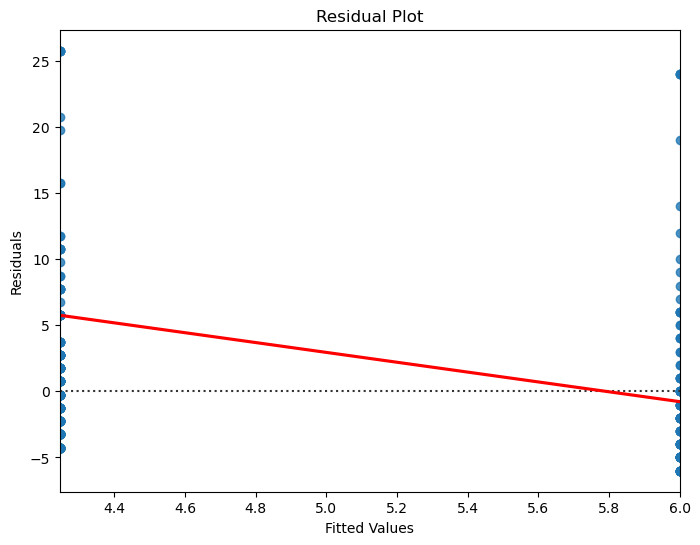

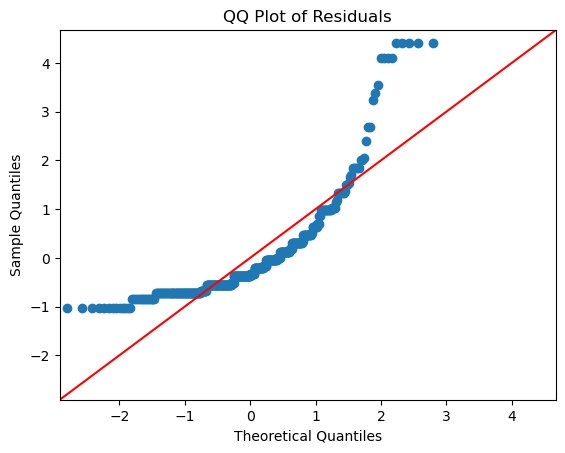

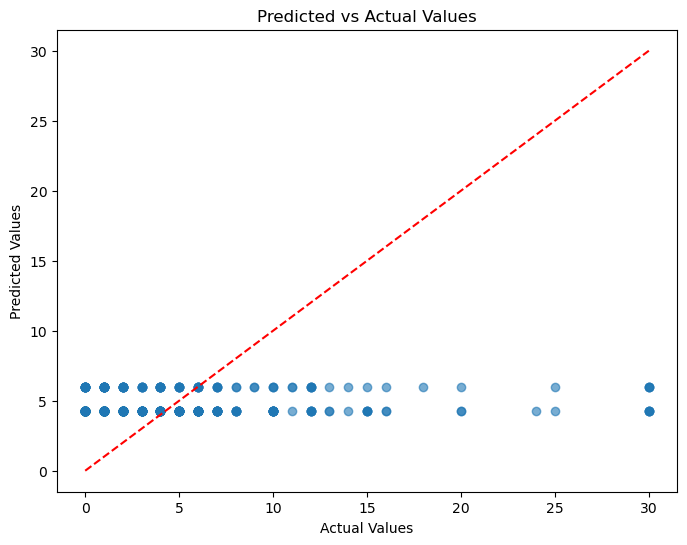

In [26]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Create the OLS model using smf.ols (as per your provided code)
formula = 'CONNECTION_social_time_friends_p7d ~ CONNECTION_social_barriers_too_busy'
ols_model = smf.ols(formula=formula, data=filtered_data_no_na).fit()

# Step 2: Get the residuals and predicted values
residuals = ols_model.resid
predicted_values = ols_model.fittedvalues

# Step 3: Residual Plot (Residuals vs Fitted Values)
plt.figure(figsize=(8, 6))
sns.residplot(x=predicted_values, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.title('Residual Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# Step 4: QQ Plot for Normality of Residuals
sm.qqplot(residuals, line='45', fit=True)
plt.title('QQ Plot of Residuals')
plt.show()

# Step 5: Predicted vs Actual Plot
plt.figure(figsize=(8, 6))
plt.scatter(filtered_data_no_na['CONNECTION_social_time_friends_p7d'], predicted_values, alpha=0.6)
plt.plot([min(filtered_data_no_na['CONNECTION_social_time_friends_p7d']),
          max(filtered_data_no_na['CONNECTION_social_time_friends_p7d'])],
         [min(filtered_data_no_na['CONNECTION_social_time_friends_p7d']),
          max(filtered_data_no_na['CONNECTION_social_time_friends_p7d'])],
         color='red', linestyle='--')
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


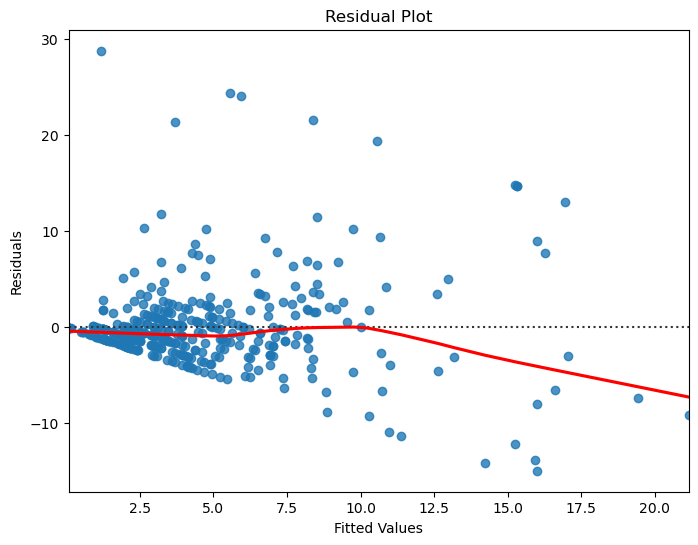

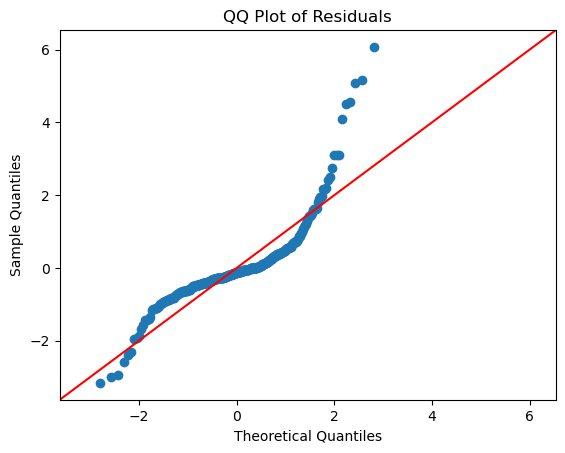

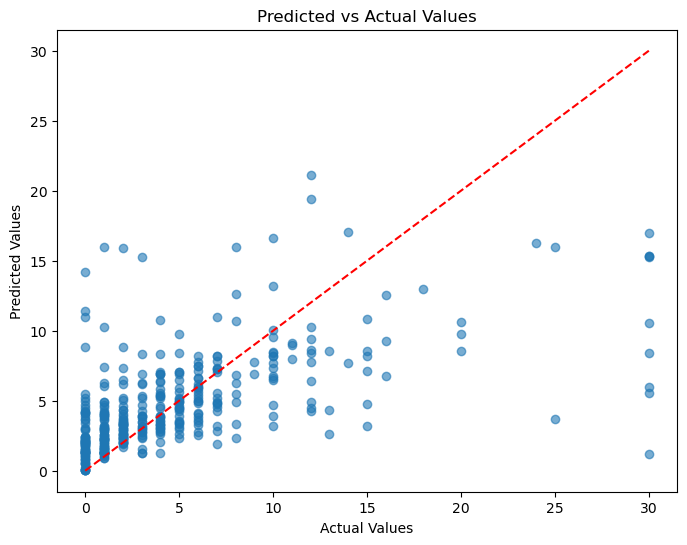

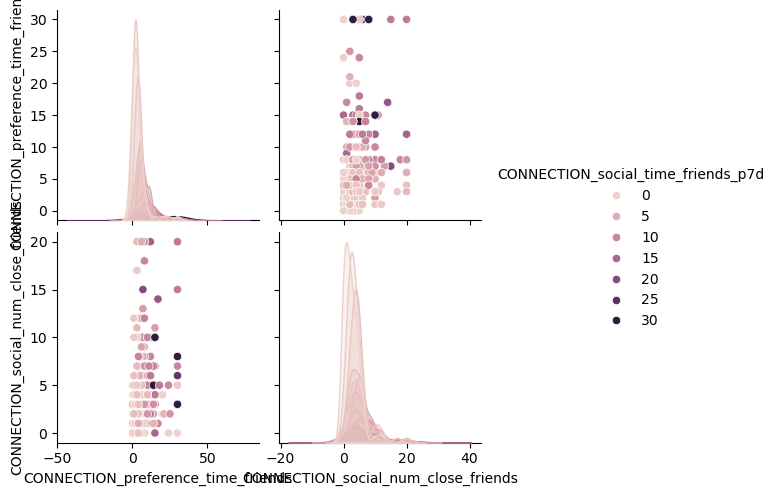

In [27]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Create the OLS model using smf.ols (as per your provided code)
formula = 'CONNECTION_social_time_friends_p7d ~ CONNECTION_social_barriers_too_busy + ' \
          'CONNECTION_preference_time_friends + ' \
          'CONNECTION_social_num_close_friends'
ols_model = smf.ols(formula=formula, data=filtered_data_no_na).fit()

# Step 2: Get the residuals and predicted values
residuals = ols_model.resid
predicted_values = ols_model.fittedvalues

# Step 3: Residual Plot (Residuals vs Fitted Values)
plt.figure(figsize=(8, 6))
sns.residplot(x=predicted_values, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.title('Residual Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# Step 4: QQ Plot for Normality of Residuals
sm.qqplot(residuals, line='45', fit=True)
plt.title('QQ Plot of Residuals')
plt.show()

# Step 5: Predicted vs Actual Plot
plt.figure(figsize=(8, 6))
plt.scatter(filtered_data_no_na['CONNECTION_social_time_friends_p7d'], predicted_values, alpha=0.6)
plt.plot([min(filtered_data_no_na['CONNECTION_social_time_friends_p7d']),
          max(filtered_data_no_na['CONNECTION_social_time_friends_p7d'])],
         [min(filtered_data_no_na['CONNECTION_social_time_friends_p7d']),
          max(filtered_data_no_na['CONNECTION_social_time_friends_p7d'])],
         color='red', linestyle='--')
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Step 6: Optional: Pairwise Correlation Plot (to see how predictors are related)
# You can use this to check for multicollinearity or relationships between predictors
correlation_data = filtered_data_no_na[['CONNECTION_social_barriers_too_busy', 
                                         'CONNECTION_preference_time_friends', 
                                         'CONNECTION_social_num_close_friends', 
                                         'CONNECTION_social_time_friends_p7d']]
sns.pairplot(correlation_data, hue='CONNECTION_social_time_friends_p7d')
plt.show()
